In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

def f(u, t,k,S):
    return k*(S-u)**2*u

def f2(u, t,k1,k2,k3,A0):
    return [k1*A0-k2*u[0]*u[1],k2*u[0]*u[1]-k3*u[1],k3*u[1]]

def lotke(A0,X0,Y0,k1,k2,k3,tmax):
    t = np.linspace(0, tmax, tmax*10)
    sol = sc.integrate.odeint(f2, [X0,Y0,0], t,args=(k1,k2,k3,A0))
    X=sol[:,0]
    Y=sol[:,1]
    P=sol[:,2]
    plt.figure()
    plt.plot(t,X,label='X')
    plt.plot(t,Y,label='Y')
    plt.plot(t,P,label='P')
    plt.legend()
    plt.grid()
    a=r'$[A]_0$'
    x=r'$[X]_0$'
    y=r'$[Y]_0$'
    k1_=r'$k_1$'
    k2_=r'$k_2$'
    k3_=r'$k_3$'
    plt.text(tmax*0.8,max(P)/3*2,f"{a} = {A0}\n{x} = {X0}\n{y} = {Y0}\n{k1_} = {k1}\n{k2_} = {k2}\n{k3_} = {k3}")
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(X,Y,P)
    ax.set(xlabel="X", ylabel="Y", zlabel="P")


def avtocatal(A0,P0,k,tmax):
    t = np.linspace(0, tmax, tmax*10)
    S=A0+P0
    P = sc.integrate.odeint(f, P0, t,args=(k,S))
    A=S-P
    plt.figure()
    plt.plot(t, P, 'b',label='P')
    plt.plot(t, A, 'r',label='A')
    plt.plot([t[0],t[-1]],[1.9,1.9],'k')
    plt.xlabel("t")
    plt.ylabel('Concentrate')
    a=r'$[A]_0$'
    p=r'$[P]_0$'
    k_=r'$k$'
    plt.text(tmax*0.8,S/3*2,f"{a} = {A0}\n{p} = {P0}\n{k_} = {k}")
    plt.legend(loc='best')
    plt.grid()
    plt.figure()
    plt.plot(A,P)
    plt.xlabel("A")
    plt.ylabel('P')
    plt.grid()

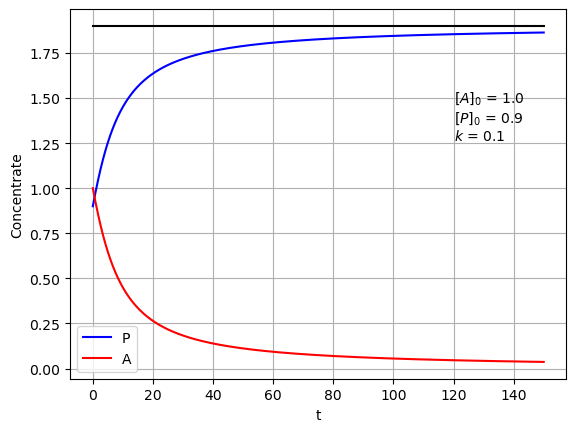

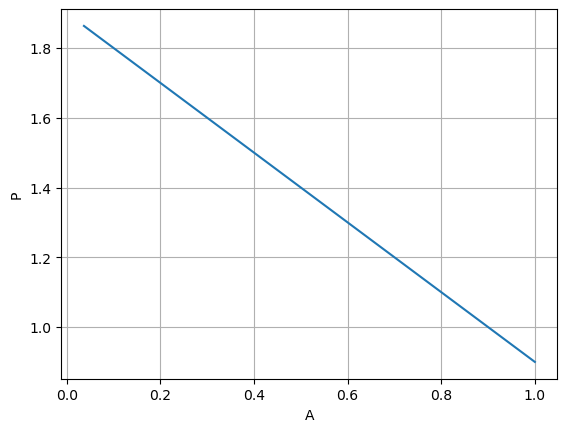

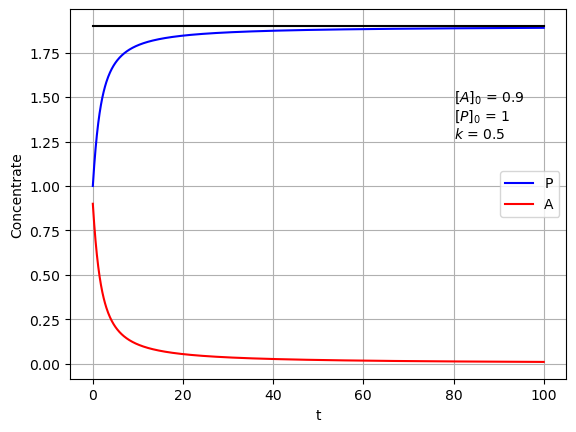

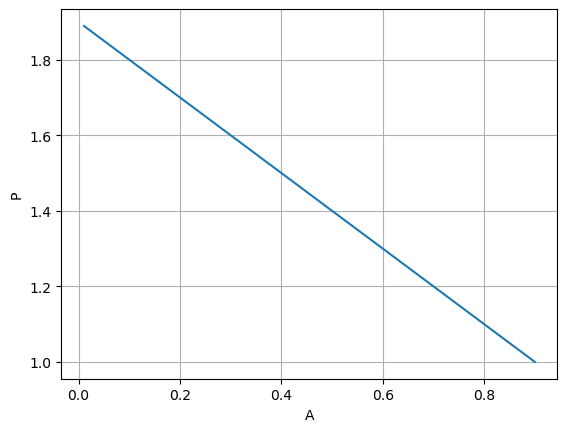

In [24]:
avtocatal(1.0,0.9,0.1,150)

avtocatal(0.9,1,0.5,100)

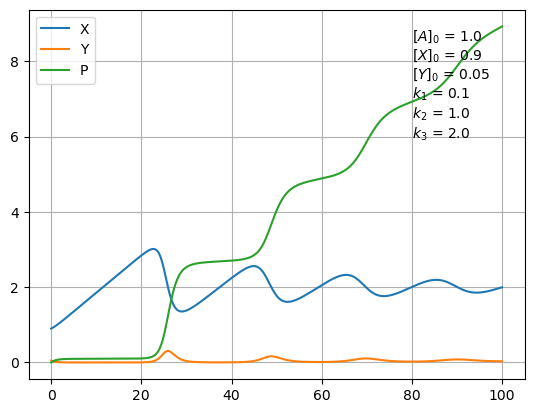

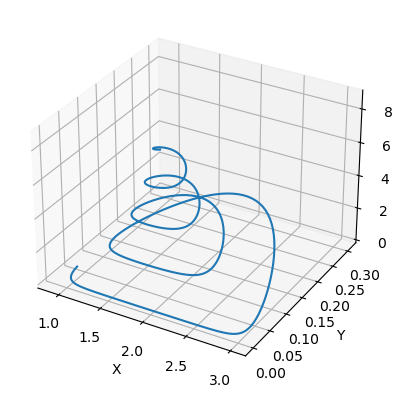

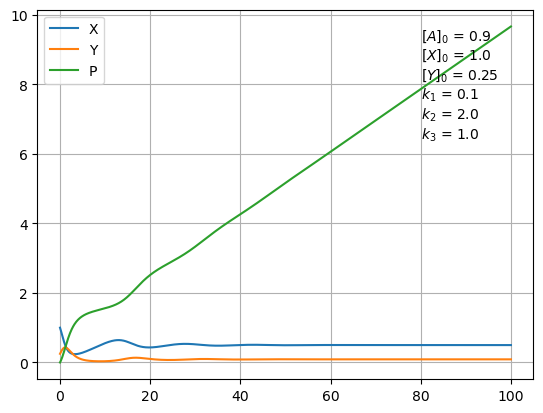

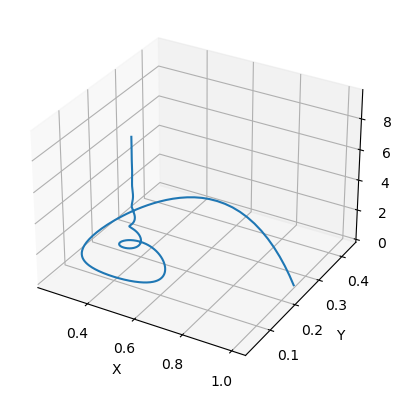

In [30]:
lotke(1.0,0.9,0.05,0.1,1.0,2.0,100)
lotke(0.9,1.0,0.25,0.1,2.0,1.0,100)